In [283]:
import pandas as pd
import numpy as np
import glob

In [363]:
label='abrupt'
label='incremental'
label='gradual'
path = f'../output/run_20221206-202107-OnlineModels/INSECTS-{label}_balanced_norm_Dataset/*.csv'

dataset_name = path.split('/')[-2]
print(dataset_name)
files = glob.glob(path)

INSECTS-gradual_balanced_norm_Dataset


In [364]:
selected_models = [
    'NoChangeClassifier_def',
    'MajorityClassClassifier_def',
    'SAMKNNClassifier_ltm',
    'HoeffdingTreeClassifier_def',
    'HoeffdingAdaptiveTreeClassifier_def',
    'AdaptiveRandomForestClassifier_def',
    'OzaBaggingClassifier_knn'
]

In [365]:
labels = []
data = []
avg_acc = []
for file in files:
    f = pd.read_csv(file)
    if f.columns[-1] in selected_models or True:
        labels.append(f.columns[-1])
        data.append(f[f.columns[-1]].values)
        avg_acc.append(np.array(data[-1]).mean())

In [366]:
for l, a in zip(labels, avg_acc):
    print(f'{l}: {a:.2f}')

AdaptiveRandomForestClassifier_def: 71.04
HoeffdingAdaptiveTreeClassifier_def: 59.90
HoeffdingTreeClassifier_def: 58.86
LeveragingBaggingClassifier_knn: 63.14
LeveragingBaggingClassifier_vfdt: 66.60
MajorityClassClassifier_def: 14.99
NoChangeClassifier_def: 35.48
OzaBaggingClassifier_knn: 67.84
OzaBaggingClassifier_vfdt: 60.01
SAMKNNClassifier_ltm: 67.60
SAMKNNClassifier_no_ltm: 66.97


In [367]:
import matplotlib.pyplot as plt
import random

class Plot:
    def __init__(self, out_file) -> None:
        self.out_file = out_file
        self.plot_metrics = []
        self.labels = []
        self.markers = ['+', '*','^',',', 'o', '.', '1', 'p']
        self.colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    def add_results(self, X, Y, label):
        self.plot_metrics.append([X,Y])
        self.labels.append(label)
    
    def plot(self, title, xlabel, ylabel):
        plt.clf()
        
        ax = plt.subplot(111)
        box = ax.get_position()
        ax.set_position([box.x0, box.y0, box.width * 0.95, box.height])
       
        
        for ind, ((x,y),l) in enumerate(zip(self.plot_metrics,self.labels)):
            ax.plot(x,y, label=l, marker=self.markers[ind%8], color=self.colors[ind%7], markersize=2, linewidth=1)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.set_yticks(np.arange(0, 101, 20)) 
        ax.set_title(title)
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.savefig(self.out_file, bbox_inches='tight')



# Abrupt

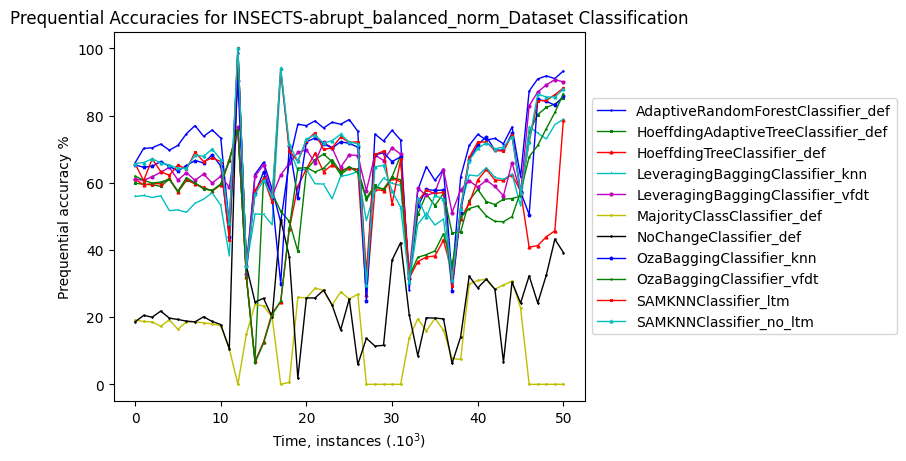

In [362]:
# abrupt
out_file = f'../output/run_20221206-202107-OnlineModels/{label}_Balanced_PreqAccuraciesPlot_ALL.png'
plt_obj = Plot(out_file)
for d, l in zip(data, labels):
    plt_obj.add_results(list(range(len(d))),d, l)

plt_obj.plot(title=f'Prequential Accuracies for {dataset_name} Classification',
                     xlabel='Time, instances ($.10^3$)',
                     ylabel='Prequential accuracy %')

# Gradual

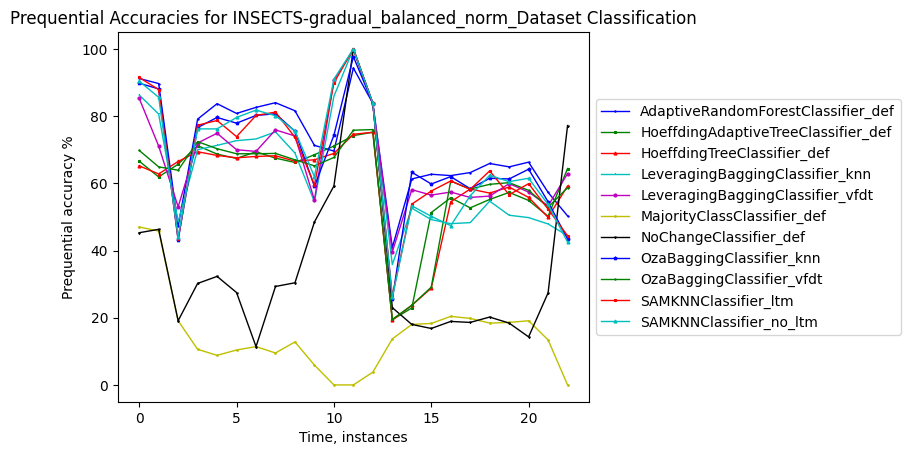

In [368]:
# gradual
out_file = f'../output/run_20221206-202107-OnlineModels/{label}_Balanced_PreqAccuraciesPlot_ALL.png'
plt_obj = Plot(out_file)
for d, l in zip(data, labels):
    plt_obj.add_results(list(range(len(d))),d, l)

plt_obj.plot(title=f'Prequential Accuracies for {dataset_name} Classification',
                     xlabel='Time, instances',
                     ylabel='Prequential accuracy %')

# Incremental

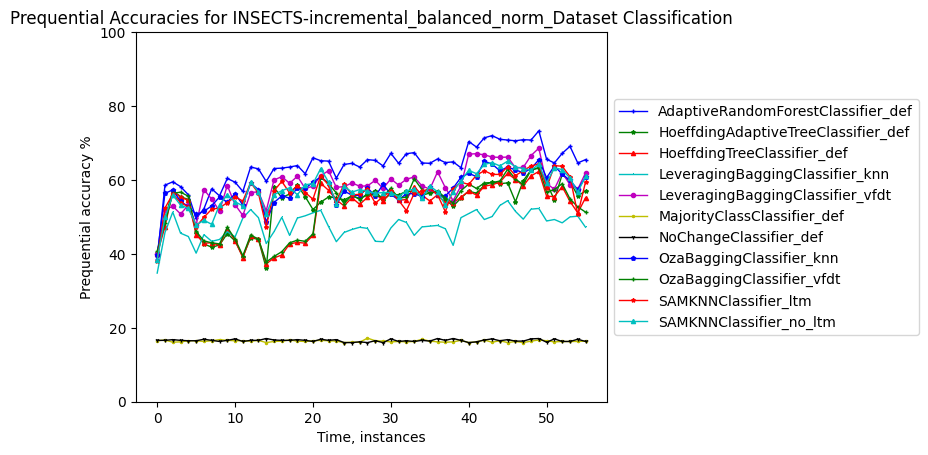

In [67]:
# incremental
out_file = f'../output/run_20221206-202107-OnlineModels/{label}_Balanced_PreqAccuraciesPlot_ALL.png'
plt_obj = Plot(out_file)
for d, l in zip(data, labels):
    plt_obj.add_results(list(range(len(d))),d, l)

plt_obj.plot(title=f'Prequential Accuracies for {dataset_name} Classification',
                     xlabel='Time, instances',
                     ylabel='Prequential accuracy %')

# Drift Detection Plots

In [353]:
import matplotlib.pyplot as plt
import random
import numpy as np

import pandas as pd

label = 'abrupt'
label = 'incremental'
label = 'gradual'

ht = f'../output/run_20221207-112758-DriftDetection/INSECTS-{label}_balanced_norm_Dataset/INSECTS-{label}_balanced_norm_HoeffdingTreeClassifier_def_preq_sliding_accuracy.csv'
htadwin = f'../output/run_20221207-112758-DriftDetection/INSECTS-{label}_balanced_norm_Dataset/INSECTS-{label}_balanced_norm_HoefdingTreesADWINComplete_def_preq_sliding_accuracy.csv'
htadwin_cp = f'../output/run_20221207-112758-DriftDetection/INSECTS-{label}_balanced_norm_Dataset/INSECTS-{label}_balanced_norm_HoefdingTreesADWINComplete_def_change_points.csv'

ht_df = pd.read_csv(ht)
htadwin_df = pd.read_csv(htadwin)
htadwin_cp = pd.read_csv(htadwin_cp)

        
        
class Plot:
    def __init__(self, out_file) -> None:
        self.out_file = out_file
        self.plot_metrics = []
        self.labels = []
        self.markers = ['+', '*','^',',', 'o', '.', '1', 'p']
        self.colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    def add_results(self, X, Y, label):
        self.plot_metrics.append([X,Y])
        self.labels.append(label)
    
    def plot(self, title, xlabel, ylabel, vlines=None, gtlines=None):
        plt.clf()
        
        ax = plt.subplot(111)
        box = ax.get_position()
        ax.set_position([box.x0, box.y0, box.width * 0.95, box.height])
       
        for ind, ((x,y),l) in enumerate(zip(self.plot_metrics,self.labels)):
            x = [1000*x_ for x_ in x]
            ax.plot(x, y, label=l, marker=self.markers[ind%8], color=self.colors[ind%7], markersize=3, linewidth=1)
            
        if vlines is not None:
            _ = ax.vlines(x=vlines, ymin=0, ymax=100, colors='r',lw=1, ls='--')
        if gtlines is not None:
            _ = ax.vlines(x=gtlines, ymin=0, ymax=100, colors='k',lw=2, ls='-')
            # get spans
            spans = []
            for g in gtlines:
                if len(spans)==0:
                    spans.append([0,g])
                else:
                    spans.append([spans[-1][-1]+1,g])
                    
            spans.append([spans[-1][-1], x[-1]])
            for i,span in enumerate(spans):
                ax.axvspan(span[0], span[1], ymin=0, ymax=100, alpha=0.2, color=self.colors[i%7])
        
        
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.set_yticks(np.arange(0, 101, 20)) 
        ax.set_title(title)
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        ax.margins(x=0)
        ax.margins(y=0)
        plt.savefig(self.out_file, bbox_inches='tight')

In [354]:
ht_acc = ht_df[ht_df.columns[-1]].values
htadwin_acc = htadwin_df[htadwin_df.columns[-1]].values
htadwin_cp = htadwin_cp[htadwin_cp.columns[-1]].values
print('Mean of Preq Accuracies of HT: ',ht_acc.mean())
print('Mean of Preq Accuracies of HT AdwinComplete: ',htadwin_acc.mean())

Mean of Preq Accuracies of HT:  51.96607142857143
Mean of Preq Accuracies of HT AdwinComplete:  54.20714285714286


In [356]:
d_win = {}
for x in htadwin_cp:
    if x%1000 not in d_win:
        d_win[x//1000]=x
    else:
        d_win[x//1000]=max(d_win[x//1000],x)
htadwin_cp = sorted([x for x in d_win.values()])[:-1]
print(len(htadwin_cp))

8


# Abrupt Balanced

../output/run_20221207-112758-DriftDetection/abrupt_Balanced_AdwinDrift.png


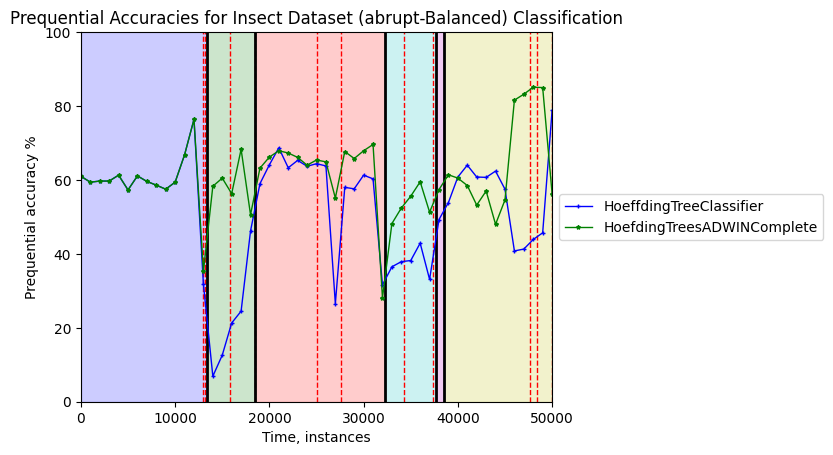

In [253]:
out_file = f'../output/run_20221207-112758-DriftDetection/{label}_Balanced_AdwinDrift.png'
print(out_file)
plt_obj = Plot(out_file)
plt_obj.add_results(list(range(len(ht_acc))),ht_acc, 'HoeffdingTreeClassifier')
plt_obj.add_results(list(range(len(htadwin_acc))),htadwin_acc, 'HoefdingTreesADWINComplete')

# abrupt
if label=='abrupt':
    # reference change points in paper
    cp = [14352, 19500, 33240, 38682, 39510]
    cp = [x-1000 for x in cp]
elif label=='incremental':
    cp = None
else:
    # reference concepts from paper
    cp = [11500,14028]
    cp = [x-1000 for x in cp]


# gradual
plt_obj.plot(title=f'Prequential Accuracies for Insect Dataset ({label}-Balanced) Classification',
                     xlabel='Time, instances',
                     ylabel='Prequential accuracy %',
                     vlines = htadwin_cp,
                     gtlines = cp)

# Incremental Balanced 

../output/run_20221207-112758-DriftDetection/incremental_Balanced_AdwinDrift.png


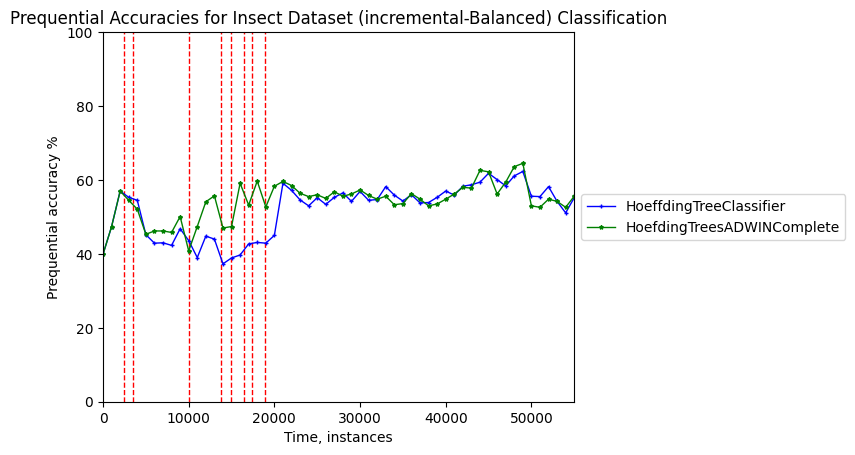

In [249]:
out_file = f'../output/run_20221207-112758-DriftDetection/{label}_Balanced_AdwinDrift.png'
print(out_file)
plt_obj = Plot(out_file)
plt_obj.add_results(list(range(len(ht_acc))),ht_acc, 'HoeffdingTreeClassifier')
plt_obj.add_results(list(range(len(htadwin_acc))),htadwin_acc, 'HoefdingTreesADWINComplete')

# abrupt
if label=='abrupt':
    # reference change points in paper
    cp = [14352, 19500, 33240, 38682, 39510]
    cp = [x-1000 for x in cp]
elif label=='incremental':
    cp = None
else:
    # reference concepts from paper
    cp = [11500,14028]
    cp = [x-1000 for x in cp]


# gradual
plt_obj.plot(title=f'Prequential Accuracies for Insect Dataset ({label}-Balanced) Classification',
                     xlabel='Time, instances',
                     ylabel='Prequential accuracy %',
                     vlines = htadwin_cp,
                     gtlines = cp)

# Gradual Balanced

../output/run_20221207-112758-DriftDetection/gradual_Balanced_AdwinDrift.png


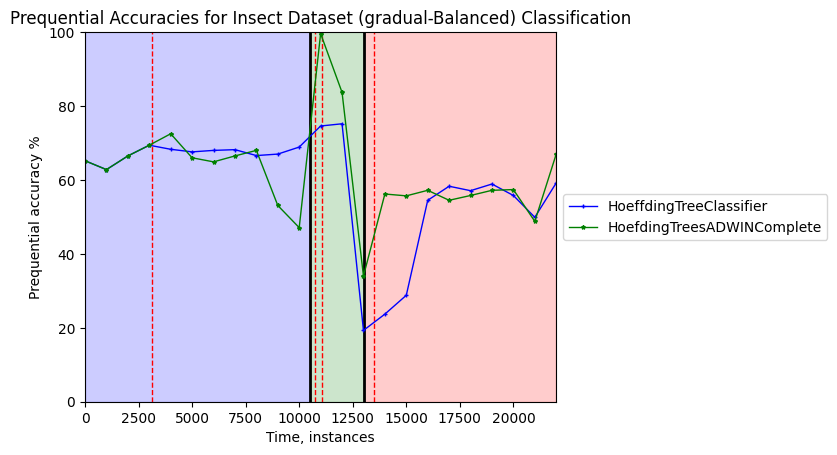

In [261]:
out_file = f'../output/run_20221207-112758-DriftDetection/{label}_Balanced_AdwinDrift.png'
print(out_file)
plt_obj = Plot(out_file)
plt_obj.add_results(list(range(len(ht_acc))),ht_acc, 'HoeffdingTreeClassifier')
plt_obj.add_results(list(range(len(htadwin_acc))),htadwin_acc, 'HoefdingTreesADWINComplete')

# abrupt
if label=='abrupt':
    # reference change points in paper
    cp = [14352, 19500, 33240, 38682, 39510]
    cp = [x-1000 for x in cp]
elif label=='incremental':
    cp = None
else:
    # reference concepts from paper
    cp = [11500,14028]
    cp = [x-1000 for x in cp]


# gradual
plt_obj.plot(title=f'Prequential Accuracies for Insect Dataset ({label}-Balanced) Classification',
                     xlabel='Time, instances',
                     ylabel='Prequential accuracy %',
                     vlines = htadwin_cp,
                     gtlines = cp)